In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy import stats
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
import requests
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [38]:
URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

req = requests.get(URL)

In [39]:
req.headers

{'Connection': 'keep-alive', 'Content-Length': '154500', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Content-Type': 'text/plain; charset=utf-8', 'ETag': 'W/"d901e6fe53bcc43168991cd6d6156d10a1dc274f9088d941dfbe6520d54137fc"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'X-GitHub-Request-Id': '57A0:421B:E92970:F2986A:64D4AF6A', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Thu, 10 Aug 2023 09:35:39 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-vie6322-VIE', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'X-Timer': 'S1691660139.223803,VS0,VE232', 'Vary': 'Authorization,Accept-Encoding,Origin', 'Access-Control-Allow-Origin': '*', 'Cross-Origin-Resource-Policy': 'cross-origin', 'X-Fastly-Request-ID': 'baca59994fcae48d6695115e79400669c8f10871', 'Expires': 'Thu, 10 Aug 2023 09:40:39 GMT', 'Source-Age':

In [40]:
match req.status_code:
    case 200: 
        df = pd.read_csv(URL)
    case 404: 
        raise 'Problem with connection'
    case _ :
        raise f'Something wrong {req.status_code}'

In [41]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [42]:
df.tail()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [43]:
df.columns

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [44]:
#Size of dataset
df.shape

(3694, 14)

In [45]:
df.dtypes

Unnamed: 0             int64
item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [46]:
#count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

object     7
float64    4
int64      2
bool       1
dtype: int64

In [47]:
df.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [49]:
df.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [74]:
df['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [50]:
df['category'].value_counts()

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

In [51]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [52]:
df['sellable_online'].value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64

In [53]:
df['category'].value_counts(normalize= True)

Tables & desks                          0.165674
Bookcases & shelving units              0.148349
Chairs                                  0.130211
Sofas & armchairs                       0.115864
Cabinets & cupboards                    0.079047
Wardrobes                               0.063887
Outdoor furniture                       0.058473
Beds                                    0.056308
TV & media furniture                    0.051435
Chests of drawers & drawer units        0.033839
Children's furniture                    0.033568
Nursery furniture                       0.026259
Bar furniture                           0.012723
Trolleys                                0.007580
Café furniture                          0.007038
Sideboards, buffets & console tables    0.006226
Room dividers                           0.003519
Name: category, dtype: float64

In [76]:
# Create copy of df, for delete null 
df1 = df.copy()

df1.dropna(inplace= True)

In [77]:
df1.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,10122647,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,70404875,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
8,8,50406465,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0


In [78]:
# We can see to extra columns
df1 = df1.drop(['item_id', 'link'], axis= 1)
df1.columns

Index(['Unnamed: 0', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'other_colors', 'short_description', 'designer',
       'depth', 'height', 'width'],
      dtype='object')

In [79]:
df1.head()

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,INGOLF,Bar furniture,345.0,No old price,True,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
8,8,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0


In [80]:
df1.shape

(1899, 12)

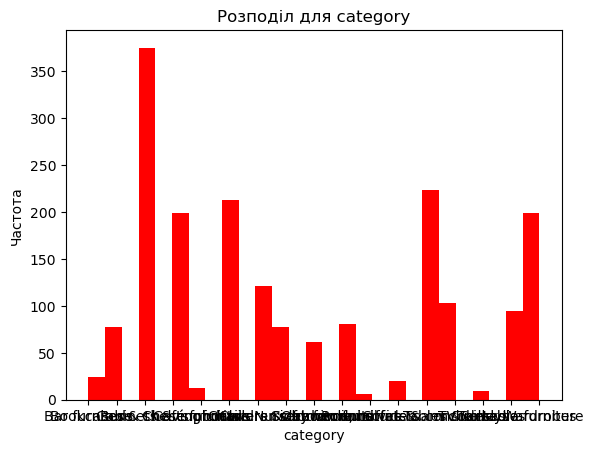

In [81]:
plt.hist(df1['category'],bins = 27, color = 'red')

plt.title('Розподіл для category')
plt.xlabel('category')
plt.ylabel('Частота')
plt.show()

In [82]:
df1['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [83]:
df1['category'].nunique()

17

In [84]:
df1.sort_values('price', ascending= False)

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
190,190,LIDHULT,Beds,9585.0,No old price,True,Yes,"Corner sofa-bed, 6-seat",Henrik Preutz/IKEA of Sweden,164.0,102.0,387.0
2344,2344,LIDHULT,Sofas & armchairs,9585.0,No old price,True,Yes,"Corner sofa-bed, 6-seat",Henrik Preutz/IKEA of Sweden,164.0,102.0,387.0
2559,2559,GRÖNLID,Sofas & armchairs,8900.0,No old price,True,No,"U-shaped sofa, 6 seat",Francis Cayouette,252.0,104.0,327.0
2387,2387,VIMLE,Sofas & armchairs,8395.0,No old price,True,Yes,"U-shaped sofa, 6 seat",Ehlén Johansson,249.0,83.0,327.0
2289,2289,KIVIK,Sofas & armchairs,8295.0,No old price,True,Yes,"U-shaped sofa, 7-seat",Ola Wihlborg,257.0,83.0,368.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1849,1849,TROFAST,Children's furniture,15.0,No old price,False,No,"Storage box, 42x30x23 cm",504.662.75 Fits in TROFAST frames.Can be stack...,30.0,23.0,42.0
2718,2718,ISBERGET,Tables & desks,10.0,No old price,True,Yes,"Tablet stand, 25x25 cm",Sarah Fager,25.0,9.0,25.0
1946,1946,TROFAST,Nursery furniture,10.0,No old price,False,No,"Storage box, 42x30x10 cm",404.662.85 Fits in TROFAST frames.Can be stack...,30.0,10.0,42.0
1839,1839,TROFAST,Children's furniture,10.0,No old price,False,No,"Storage box, 42x30x10 cm",404.662.85 Fits in TROFAST frames.Can be stack...,30.0,10.0,42.0


In [85]:
df1.sort_values(['price', 'category'], ascending= [False,True])

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
190,190,LIDHULT,Beds,9585.0,No old price,True,Yes,"Corner sofa-bed, 6-seat",Henrik Preutz/IKEA of Sweden,164.0,102.0,387.0
2344,2344,LIDHULT,Sofas & armchairs,9585.0,No old price,True,Yes,"Corner sofa-bed, 6-seat",Henrik Preutz/IKEA of Sweden,164.0,102.0,387.0
2559,2559,GRÖNLID,Sofas & armchairs,8900.0,No old price,True,No,"U-shaped sofa, 6 seat",Francis Cayouette,252.0,104.0,327.0
2387,2387,VIMLE,Sofas & armchairs,8395.0,No old price,True,Yes,"U-shaped sofa, 6 seat",Ehlén Johansson,249.0,83.0,327.0
2289,2289,KIVIK,Sofas & armchairs,8295.0,No old price,True,Yes,"U-shaped sofa, 7-seat",Ola Wihlborg,257.0,83.0,368.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2752,2752,BRÄDA,Tables & desks,15.0,No old price,True,Yes,"Laptop support, 42x31 cm",Sarah Fager,31.0,9.0,42.0
1839,1839,TROFAST,Children's furniture,10.0,No old price,False,No,"Storage box, 42x30x10 cm",404.662.85 Fits in TROFAST frames.Can be stack...,30.0,10.0,42.0
1946,1946,TROFAST,Nursery furniture,10.0,No old price,False,No,"Storage box, 42x30x10 cm",404.662.85 Fits in TROFAST frames.Can be stack...,30.0,10.0,42.0
2718,2718,ISBERGET,Tables & desks,10.0,No old price,True,Yes,"Tablet stand, 25x25 cm",Sarah Fager,25.0,9.0,25.0


In [86]:
df1.duplicated().sum()

0

In [87]:
df1.groupby('category')['price'].mean()

category
Bar furniture                            338.416667
Beds                                    2580.769231
Bookcases & shelving units               685.849600
Cabinets & cupboards                    1113.319095
Café furniture                           332.615385
Chairs                                   546.409390
Chests of drawers & drawer units         629.698347
Children's furniture                     326.500000
Nursery furniture                        404.580645
Outdoor furniture                       1120.219753
Room dividers                            817.500000
Sideboards, buffets & console tables    1156.550000
Sofas & armchairs                       3009.560538
TV & media furniture                    1085.726316
Tables & desks                           522.446602
Trolleys                                 934.222222
Wardrobes                               2146.135678
Name: price, dtype: float64

In [88]:
df1.groupby('price')['old_price'].count()

price
6.0        1
10.0       3
15.0      10
18.0       1
20.0       2
          ..
8240.0     1
8295.0     1
8395.0     1
8900.0     1
9585.0     2
Name: old_price, Length: 729, dtype: int64

In [89]:
df1.groupby('old_price')['category'].count()

old_price
No old price    1541
SR 1,010           1
SR 1,023           1
SR 1,030           1
SR 1,090           1
                ... 
SR 977             1
SR 980             1
SR 981             1
SR 99              1
SR 995             6
Name: category, Length: 248, dtype: int64

In [90]:
df1.loc[0:10,['category','designer']]

,category,designer
3,Bar furniture,Henrik Preutz
4,Bar furniture,Marcus Arvonen
5,Bar furniture,Carina Bengs
6,Bar furniture,K Hagberg/M Hagberg
8,Bar furniture,K Hagberg/M Hagberg
10,Bar furniture,K Hagberg/M Hagberg


In [91]:
df1.iloc[0:10,1:3]

,name,category
3,STIG,Bar furniture
4,NORBERG,Bar furniture
5,INGOLF,Bar furniture
6,FRANKLIN,Bar furniture
8,FRANKLIN,Bar furniture
10,FRANKLIN,Bar furniture
11,INGOLF,Bar furniture
12,NORRARYD,Bar furniture
13,FREKVENS,Bar furniture
14,EKEDALEN,Bar furniture


In [92]:
df1.head()

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,INGOLF,Bar furniture,345.0,No old price,True,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
8,8,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0


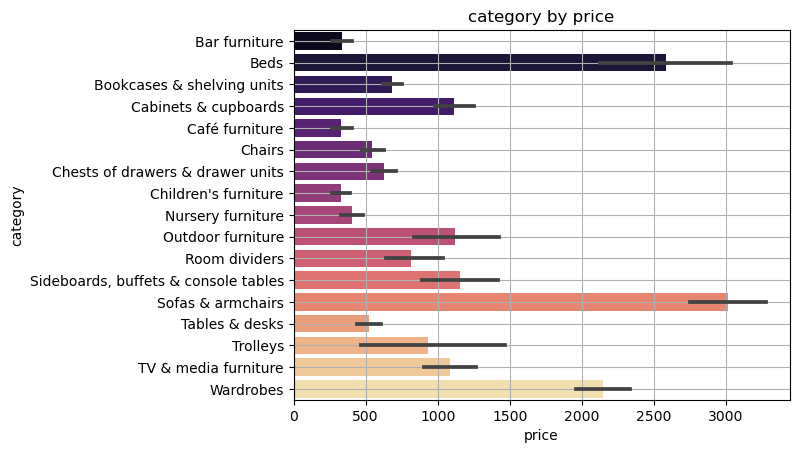

In [93]:
sns.barplot(data=df1, x="price", y="category", palette= 'magma')
plt.grid()
plt.xlabel('price')
plt.ylabel('category')
plt.title('category by price')
plt.show();

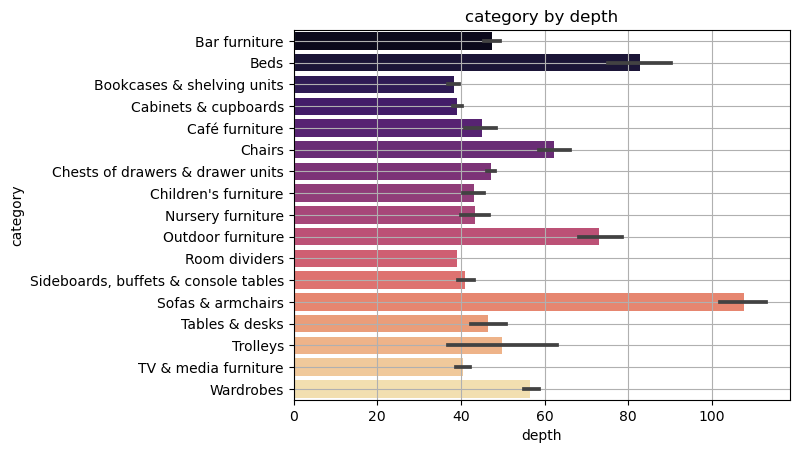

In [94]:
sns.barplot(data=df1, x="depth", y="category", palette= 'magma')
plt.grid()
plt.xlabel('depth')
plt.ylabel('category')
plt.title('category by depth')
plt.show();

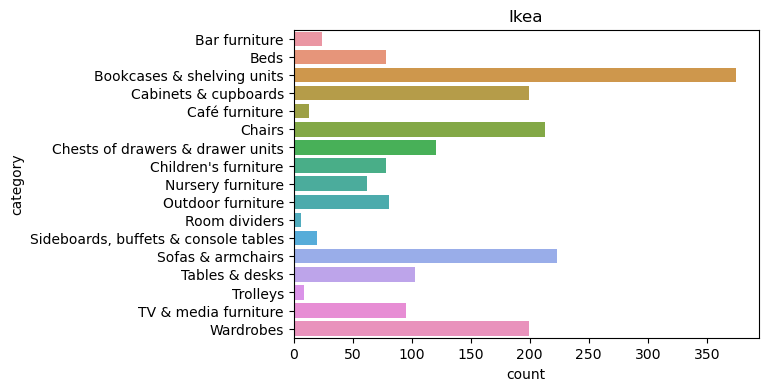

In [95]:
plt.figure(figsize = (6,4)) 

sns.countplot(y= df1.category ,data = df); 

plt.xlabel('count') 
plt.ylabel('category') 
plt.title('Ikea') 
plt.show() 

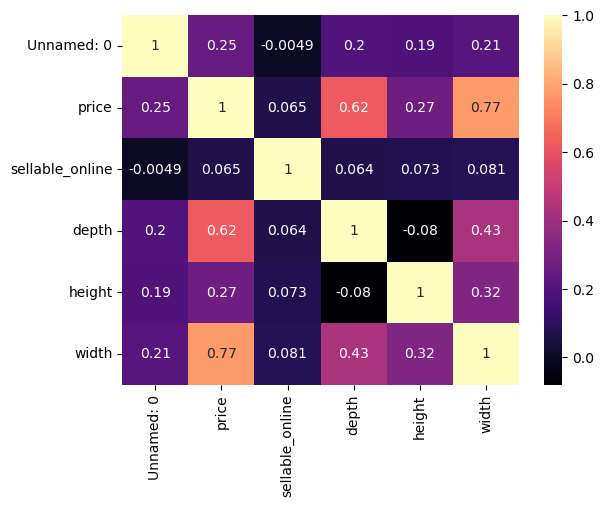

In [96]:
sns.heatmap(df1.corr(),annot= True, cmap='magma');

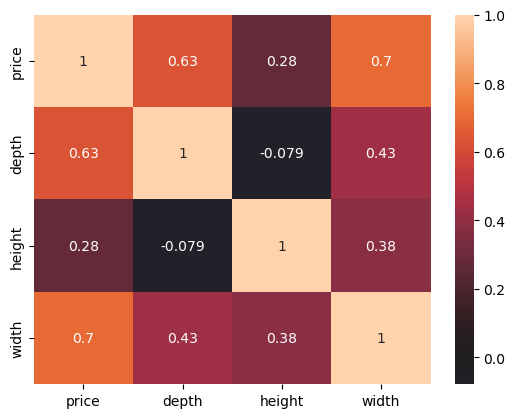

In [104]:
sns.heatmap(df[['price', 'depth', 'height', 'width']].corr(), xticklabels= df[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= df[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

In [97]:
df1.head()

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,INGOLF,Bar furniture,345.0,No old price,True,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
8,8,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0


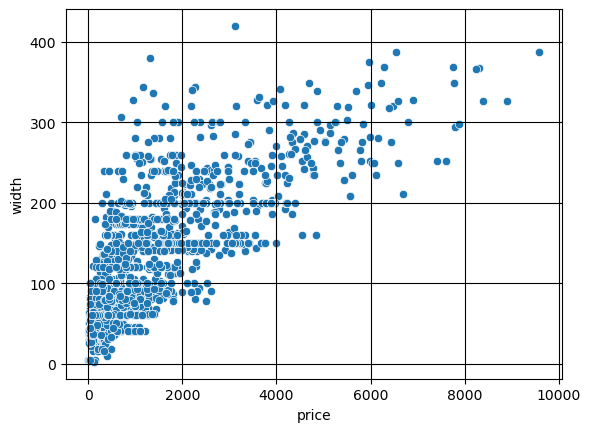

In [98]:
sns.scatterplot(x = 'price', y = 'width', data = df1);
plt.grid(color = 'black', linewidth = 0.8)

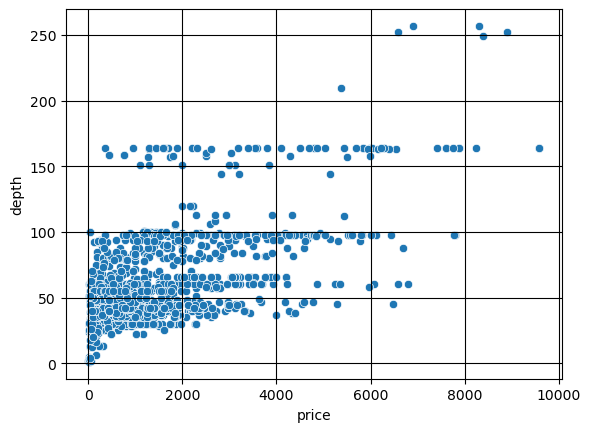

In [99]:
sns.scatterplot(x = 'price', y = 'depth', data = df1);
plt.grid(color = 'black', linewidth = 0.8)

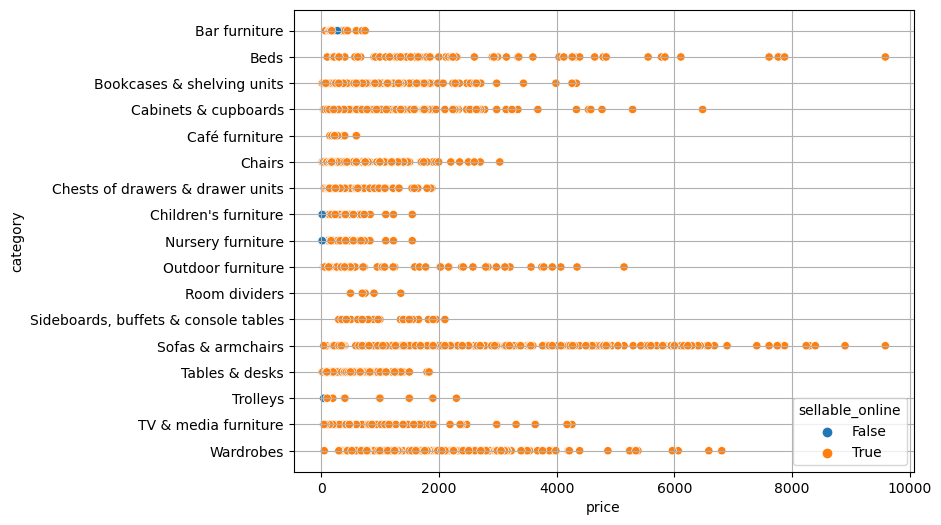

In [100]:
plt.subplots(figsize = (8,6))
sns.scatterplot(x = 'price', y = 'category', data = df1, hue = 'sellable_online');
plt.grid()

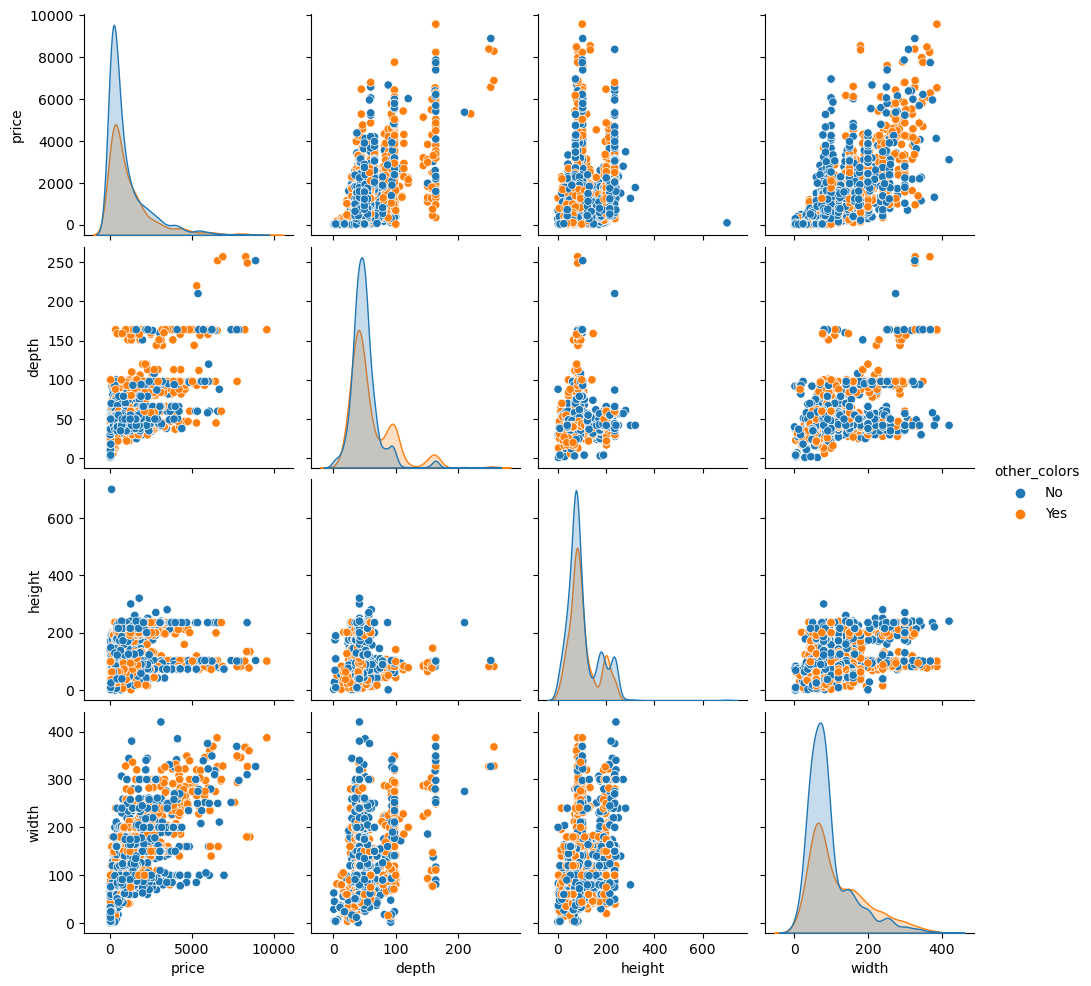

In [103]:
sns.pairplot(df[['price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors');

In [101]:
df_X = df1[['height', 'width', 'depth', 'price']]

Best features: [0 1 3]
[[ 100.   60.   69.]
 [  43.   74.  225.]
 [  91.   40.  345.]
 ...
 [ 236.  100. 2100.]
 [ 236.  150. 3985.]
 [ 236.  200. 2045.]]


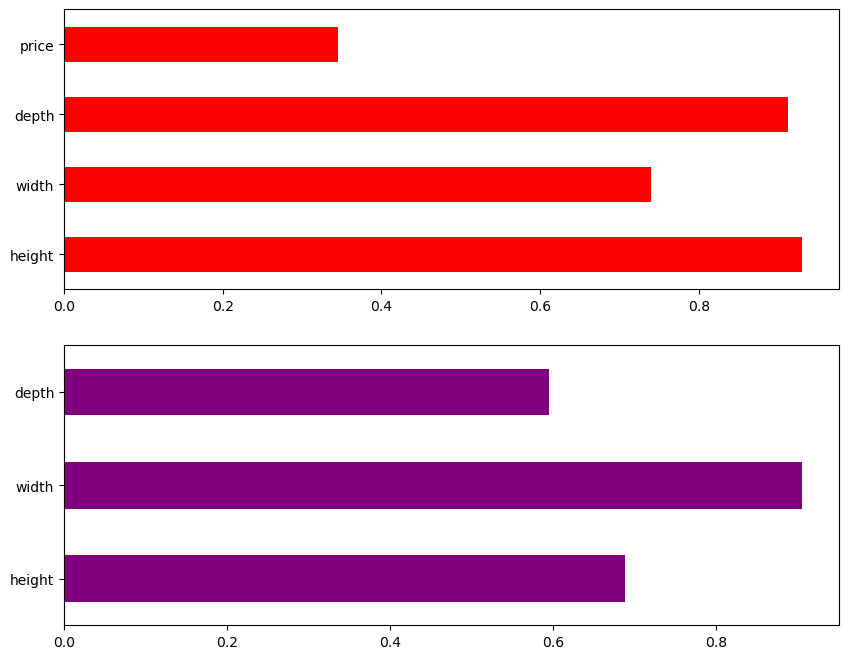

In [102]:
# Take SelectKbest to find more informative columns
# chi2 - 
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, mutual_info_regression
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

w_df_X = df1[['height', 'width', 'depth', 'price']]
w_df_y = df1['category']

# descrete 'category'
importance_0 = mutual_info_classif(w_df_X, w_df_y)
feature_importances_0 = pd.Series(importance_0, w_df_X.columns)
feature_importances_0.plot(kind='barh', color='red', ax = ax1)

w_df_X_1 = df1[['height', 'width', 'depth']]
w_df_y_1 = df1['price']

# long 'price'
importance_1 = mutual_info_regression(w_df_X_1, w_df_y_1)
feature_importances_1 = pd.Series(importance_1, w_df_X_1.columns)
feature_importances_1.plot(kind='barh', color='purple', ax = ax2)

chi2_features = SelectKBest(chi2, k=3) 
X_kbest_features = chi2_features.fit(w_df_X, w_df_y)
print('Best features:', X_kbest_features.get_support(indices=True))

transformed_X = chi2_features.transform(w_df_X)
print(transformed_X)

plt.show() # See that width and height important columns

In [105]:
df['designer'].head(15)

0     Nicholai Wiig Hansen
1        Francis Cayouette
2        Francis Cayouette
3            Henrik Preutz
4           Marcus Arvonen
5             Carina Bengs
6      K Hagberg/M Hagberg
7              Sarah Fager
8      K Hagberg/M Hagberg
9          Ehlén Johansson
10     K Hagberg/M Hagberg
11            Carina Bengs
12           Nike Karlsson
13    Nicholai Wiig Hansen
14         Ehlén Johansson
Name: designer, dtype: object

In [106]:
# Create function to clear Designers
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    if not isinstance(value, str):
        return value
    
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    
    designers = value.split("/")
    
    if removeIKEA:
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        return '/'.join(sorted(designers))
    else:
        return emptyValue

In [107]:
ikea_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col= 0).drop_duplicates()

ikea_df['designer_clean'] = df['designer'].apply(cleanDesigners, args= (False, "IKEA of Sweden"))

In [108]:
ikea_df['designer_clean'].head()

0    Nicholai Wiig Hansen
1       Francis Cayouette
2       Francis Cayouette
3           Henrik Preutz
4          Marcus Arvonen
Name: designer_clean, dtype: object

In [109]:
ikea_df.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
designer_clean          0
dtype: int64

In [121]:
# Fill in data
ikea_df['other_colors_1'] = ikea_df['other_colors'].map(dict(Yes=1, No=0))

median_d = ikea_df.groupby(['category'])['depth'].median()
median_h = ikea_df.groupby(['category'])['height'].median()
median_w = ikea_df.groupby(['category'])['width'].median()

median_price = ikea_df.groupby(['category'])['price'].median()
median_dsgn =  ikea_df.groupby(['designer_clean'])['price'].median()

ikea_df = ikea_df.set_index(['category'])
ikea_df['depth_1'] = ikea_df['depth'].fillna(median_d)
ikea_df['height_1'] = ikea_df['height'].fillna(median_h)
ikea_df['width_1'] = ikea_df['width'].fillna(median_w)
ikea_df['category_median_price'] = median_price

ikea_df = ikea_df.reset_index()

ikea_df = ikea_df.set_index(['designer_clean'])
ikea_df['designer_median_price'] = median_dsgn
ikea_df = ikea_df.reset_index()
ikea_df.head()

,designer_clean,category,item_id,name,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,other_colors_1,depth_1,height_1,width_1,category_median_price,designer_median_price
0,Nicholai Wiig Hansen,Bar furniture,90420332,FREKVENS,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,0,47.0,99.0,51.0,445.0,265.0
1,Francis Cayouette,Bar furniture,368814,NORDVIKEN,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,0,47.0,105.0,80.0,445.0,458.0
2,Francis Cayouette,Bar furniture,9333523,NORDVIKEN / NORDVIKEN,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,0,47.0,102.0,48.0,445.0,458.0
3,Henrik Preutz,Bar furniture,80155205,STIG,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,1,50.0,100.0,60.0,445.0,495.0
4,Marcus Arvonen,Bar furniture,30180504,NORBERG,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0,60.0,43.0,74.0,445.0,150.0


In [123]:
# Function to choose BestRegressor
# Step by step fit data for different model, and display result
def getBestRegressor (X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
    
    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    
    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))
        
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])
        
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

In [124]:
X1 = ikea_df[['width_1','depth_1','height_1']]
Y1 = ikea_df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)
# We can see that RandomForestRegressor have best result for predict price, next step to tunning model 

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.73798,378.38202,710.65503
GradientBoostingRegressor,0.68623,468.80575,777.68650
DecisionTreeRegressor,0.66186,444.32348,807.31160
KNeighborsRegressor,0.65086,487.74417,820.34860
LinearRegression,0.40125,670.61205,1074.28260
RidgeCV,0.40125,670.61209,1074.28264
LassoCV,0.40117,670.70663,1074.34987
SVR,0.35166,641.01016,1117.88731


In [125]:
from sklearn.model_selection import GridSearchCV
# Use  GridSearchCV for tunning model 
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,25,50,100,110,120,130, 140,150,200,500], 
                                                     'max_depth': [10,20,30,40,50,100,200,None], 
                                                     'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=0)
forest_grid.fit(X_train, Y_train)
 
print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

Best Estimator : RandomForestRegressor(max_features='log2', n_estimators=110)
Best Score     : 0.7787325634364943

R^2            : 0.74746
MAE            : 374.93483
RMSE           : 697.68708

Feature importance:
--------------------------------
0.53812    width_1
0.24025    depth_1
0.22164    height_1


<Axes: >

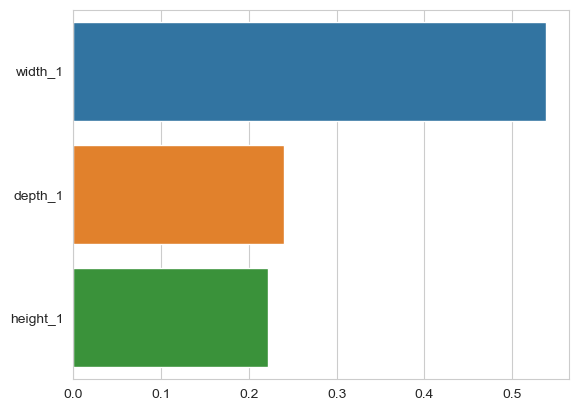

In [126]:
sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)